In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [11]:
df = pd.read_csv("../data/South African Heart Disease.txt")
x = df['sbp'].values
y = df['chd'].values
x_pos = x[y == 1]
x_neg = x[y == 0]

In [7]:
x_min, x_max = np.min(x), np.max(x)

In [31]:
x_real = np.linspace(x_min, x_max, 100)
y_real_pos = np.zeros(100)
y_real_neg = np.zeros(100)
for i in range(100):
    y_real_pos[i] = np.mean(norm.pdf(x_pos, x_real[i], 5.5))
    y_real_neg[i] = np.mean(norm.pdf(x_neg, x_real[i], 5.5))

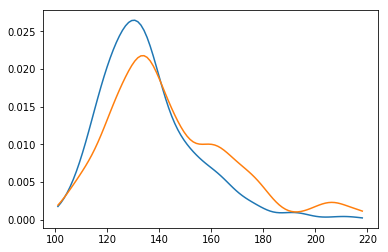

In [32]:
plt.plot(x_real, y_real_neg)
plt.plot(x_real, y_real_pos)

In [34]:
prior_pos = len(x_pos)/len(x)
prior_neg = len(x_neg)/len(x)

In [36]:
y_pos_prob = np.zeros(100)
for i in range(100):
    y_pos_prob[i] = prior_pos*y_real_pos[i]/(prior_pos*y_real_pos[i] + prior_neg*y_real_neg[i])

(0, 1)

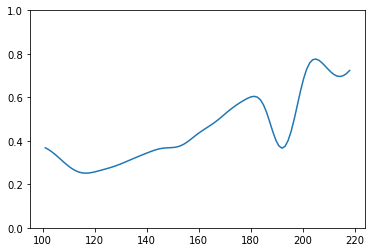

In [38]:
plt.plot(x_real, y_pos_prob)
plt.ylim(0, 1)